In [1]:
import pandas as pd
import numpy as np

# Data PREPROCESSING

In [2]:
from sklearn.impute import SimpleImputer
from google.colab import files
uploaded = files.upload()

Saving nifty_500.csv to nifty_500.csv


In [6]:
df = pd.read_csv('nifty_500.csv')

In [7]:
df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


<Axes: >

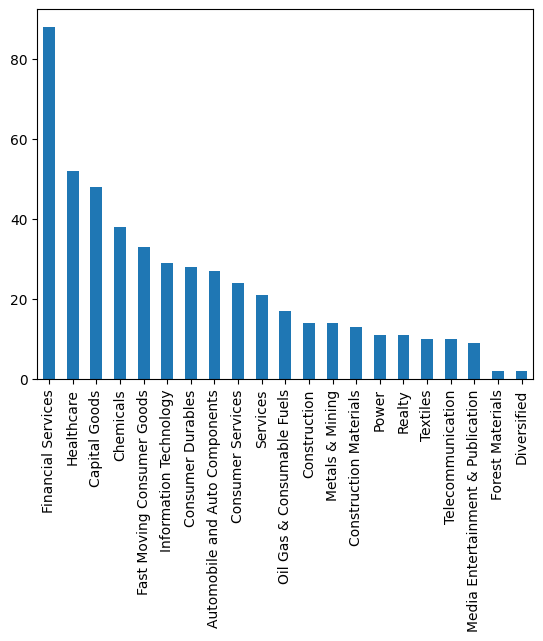

In [8]:
(df['Industry'].value_counts()).plot(kind='bar')

# Data Cleaning

In [11]:
#checking for missing values
df.isnull()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df_dropped = df.dropna() # is used to remove rows or columns from a DataFrame that contain missing (NaN) values
print(df)

                                         Company Name      Symbol  \
0                                       3M India Ltd.     3MINDIA   
1                                    Aarti Drugs Ltd.  AARTIDRUGS   
2                               Aavas Financiers Ltd.       AAVAS   
3                                      ABB India Ltd.         ABB   
4                                   Abbott India Ltd.  ABBOTINDIA   
..                                                ...         ...   
496                           Zensar Technolgies Ltd.  ZENSARTECH   
497  ZF Commercial Vehicle Control Systems India Ltd.   ZFCVINDIA   
498                                       Zomato Ltd.      ZOMATO   
499                           Zydus Lifesciences Ltd.   ZYDUSLIFE   
500                               Zydus Wellness Ltd.   ZYDUSWELL   

                           Industry Series      Open      High       Low  \
0                       Diversified     EQ  21950.00  21999.00  21126.05   
1                  

In [13]:
#when set to False it makes changes in a new dataframe

df.fillna("unknown",inplace=False) #

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Zensar Technolgies Ltd.,ZENSARTECH,Information Technology,EQ,273.15,273.55,268.40,272.10,270.00,-2.10,-0.77,186578,5.046748e+07,587.00,246.65,-12.61,-11.02
497,ZF Commercial Vehicle Control Systems India Ltd.,ZFCVINDIA,Automobile and Auto Components,EQ,7748.00,7900.00,7525.30,7716.60,7680.00,-36.60,-0.47,12790,9.884624e+07,8780.05,6793.30,-,1.43
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-,-27.86
499,Zydus Lifesciences Ltd.,ZYDUSLIFE,Healthcare,EQ,356.90,364.05,354.30,357.00,364.00,7.00,1.96,862373,3.100145e+08,651.90,319.00,-,-5.64


In [16]:
df['Open'] = df['Open'].fillna(df['Open'].mean())

In [18]:
df['Open'].isnull().sum()

0

# Tuple Duplication

In [19]:
df.drop_duplicates(subset=None) # remove dupliactes

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Zensar Technolgies Ltd.,ZENSARTECH,Information Technology,EQ,273.15,273.55,268.40,272.10,270.00,-2.10,-0.77,186578,5.046748e+07,587.00,246.65,-12.61,-11.02
497,ZF Commercial Vehicle Control Systems India Ltd.,ZFCVINDIA,Automobile and Auto Components,EQ,7748.00,7900.00,7525.30,7716.60,7680.00,-36.60,-0.47,12790,9.884624e+07,8780.05,6793.30,-,1.43
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-,-27.86
499,Zydus Lifesciences Ltd.,ZYDUSLIFE,Healthcare,EQ,356.90,364.05,354.30,357.00,364.00,7.00,1.96,862373,3.100145e+08,651.90,319.00,-,-5.64


In [20]:
bool_series=df.duplicated(subset=None,keep=False) # findind dupliactes
bool_series

0      False
1      False
2      False
3      False
4      False
       ...  
496    False
497    False
498    False
499    False
500    False
Length: 501, dtype: bool

In [21]:
df1_unique=df[-bool_series]
df1_unique # Storing the unique tuples in seperate dataframe

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Zensar Technolgies Ltd.,ZENSARTECH,Information Technology,EQ,273.15,273.55,268.40,272.10,270.00,-2.10,-0.77,186578,5.046748e+07,587.00,246.65,-12.61,-11.02
497,ZF Commercial Vehicle Control Systems India Ltd.,ZFCVINDIA,Automobile and Auto Components,EQ,7748.00,7900.00,7525.30,7716.60,7680.00,-36.60,-0.47,12790,9.884624e+07,8780.05,6793.30,-,1.43
498,Zomato Ltd.,ZOMATO,Consumer Services,EQ,54.15,56.70,52.55,53.85,56.00,2.15,3.99,112078641,6.193466e+09,169.00,50.05,-,-27.86
499,Zydus Lifesciences Ltd.,ZYDUSLIFE,Healthcare,EQ,356.90,364.05,354.30,357.00,364.00,7.00,1.96,862373,3.100145e+08,651.90,319.00,-,-5.64


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [26]:
df=df.sort_values(by='High',ascending=False)
df.reset_index(drop=True,inplace=True)
df

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,MRF Ltd.,MRF,Automobile and Auto Components,EQ,70300.00,72500.00,70300.00,70800.90,71900.00,"1,099.10",1.55,5409,3.860072e+08,87550.00,63000.00,-11.59,-8.82
1,Page Industries Ltd.,PAGEIND,Textiles,EQ,40199.00,41599.90,40124.95,40166.50,41236.60,"1,070.10",2.66,13064,5.352518e+08,46737.70,29119.95,36.06,-11.12
2,Honeywell Automation India Ltd.,HONAUT,Capital Goods,EQ,34069.80,34069.80,33133.65,33787.70,33244.05,-543.65,-1.61,1860,6.203643e+07,47275.95,30185.35,-19.23,4.96
3,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
4,Shree Cement Ltd.,SHREECEM,Construction Materials,EQ,19050.00,19272.00,18898.85,19009.70,19233.05,223.35,1.17,17699,3.387541e+08,31469.95,17865.20,-30.89,-14.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Infibeam Avenues Ltd.,INFIBEAM,Information Technology,EQ,13.90,14.10,13.40,14.10,13.60,-0.50,-3.55,2029884,2.766732e+07,28.05,12.50,-72.81,-4.41
497,Yes Bank Ltd.,YESBANK,Financial Services,EQ,12.65,12.75,12.55,12.65,12.70,0.05,0.40,18633694,2.359026e+08,16.25,10.50,-6.64,-3.80
498,UCO Bank,UCOBANK,Financial Services,EQ,11.00,11.20,10.75,10.95,11.05,0.10,0.91,1157345,1.270765e+07,15.90,10.55,-27.96,-5.60
499,Vodafone Idea Ltd.,IDEA,Telecommunication,EQ,8.35,8.60,8.20,8.40,8.50,0.10,1.19,65435996,5.476993e+08,16.80,4.55,-15.58,-12.50


In [27]:
# Normalization with binning by mean for the 'Open' column
col = 'Open'
mean_val = df[col].mean()
df[col + '_mean_bin'] = pd.cut(df[col], bins=[-float('inf'), mean_val, float('inf')], labels=['Below Mean', 'Above Mean'])

In [28]:
# Normalization with binning by boundary for the 'Open' column
lower_bound = df[col].min()
upper_bound = df[col].max()
df[col + '_boundary_bin'] = pd.cut(df[col], bins=[-float('inf'), lower_bound, upper_bound, float('inf')],
                                   labels=['Below Min', 'Between Min-Max', 'Above Max'])

In [29]:
# Normalization with binning by median for the 'Open' column
median_val = df[col].median()
df[col + '_median_bin'] = pd.cut(df[col], bins=[-float('inf'), median_val, float('inf')], labels=['Below Median', 'Above Median'])

# Check the updated DataFrame
print(df.head())

                      Company Name    Symbol                        Industry  \
0                         MRF Ltd.       MRF  Automobile and Auto Components   
1             Page Industries Ltd.   PAGEIND                        Textiles   
2  Honeywell Automation India Ltd.    HONAUT                   Capital Goods   
3                    3M India Ltd.   3MINDIA                     Diversified   
4                Shree Cement Ltd.  SHREECEM          Construction Materials   

  Series     Open     High       Low  Previous Close  Last Traded Price  \
0     EQ  70300.0  72500.0  70300.00        70800.90           71900.00   
1     EQ  40199.0  41599.9  40124.95        40166.50           41236.60   
2     EQ  34069.8  34069.8  33133.65        33787.70           33244.05   
3     EQ  21950.0  21999.0  21126.05        21854.05           21575.00   
4     EQ  19050.0  19272.0  18898.85        19009.70           19233.05   

     Change Percentage Change  Share Volume  Value (Indian Rupee)  \

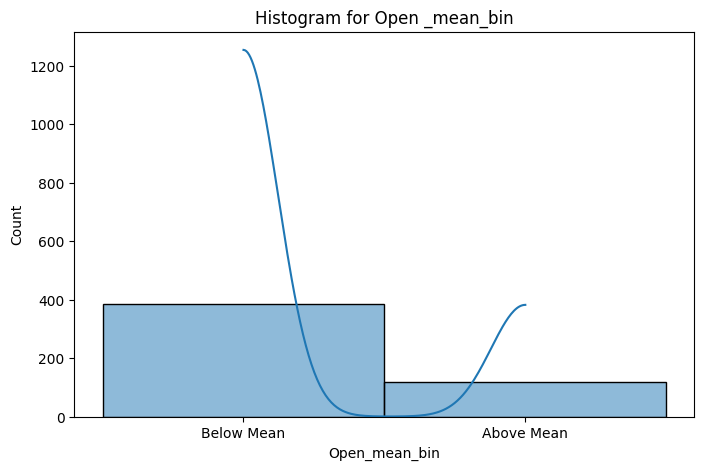

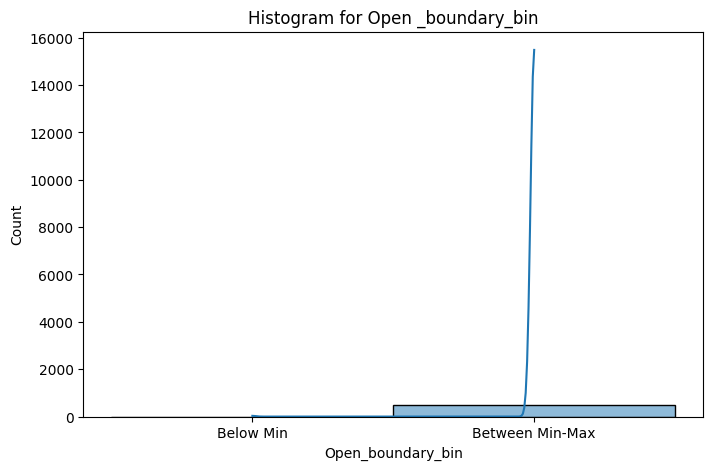

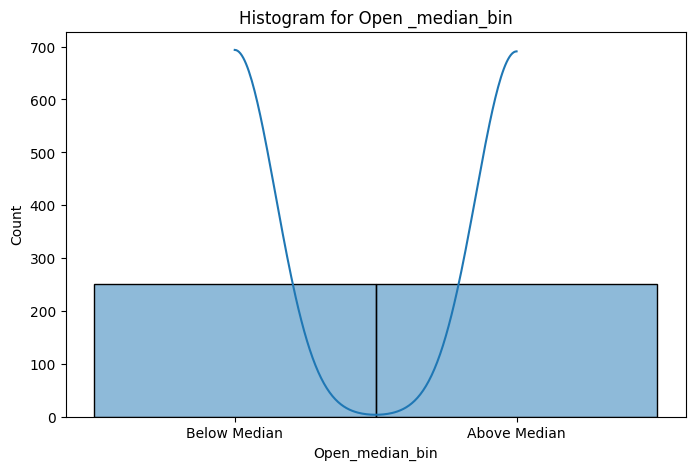

In [31]:
# Plot histograms for each bin
import seaborn as sns
for bin_type in ['_mean_bin', '_boundary_bin', '_median_bin']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col + bin_type, kde=True)
    plt.title(f'Histogram for {col} {bin_type}')
    plt.show()

### 2. Normalisation

In [33]:
#### (1) Z-Score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
# Z-score normalization for the 'Open' column
col = 'Open'
z_score_scaler = StandardScaler()
df[col + '_z_score'] = z_score_scaler.fit_transform(df[[col]])


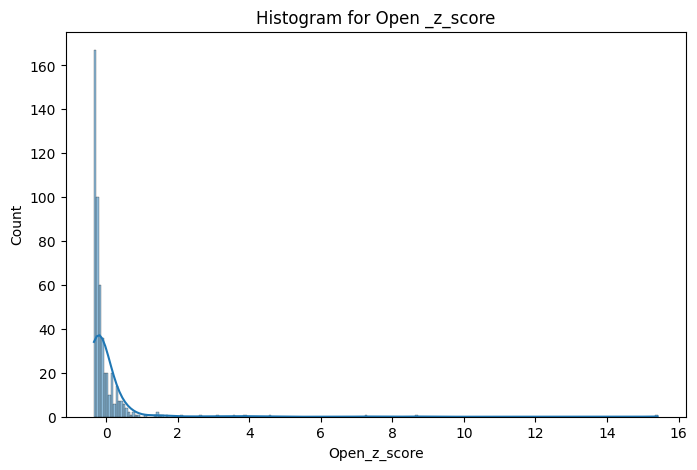

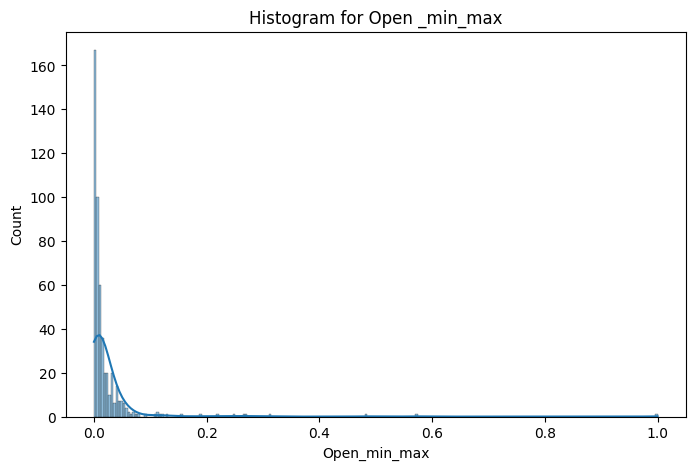

In [35]:


# Min-Max scaling for the 'Open' column
min_max_scaler = MinMaxScaler()
df[col + '_min_max'] = min_max_scaler.fit_transform(df[[col]])

# Plot histograms for each scaling method
for scaling_type in ['_z_score', '_min_max']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col + scaling_type, kde=True)
    plt.title(f'Histogram for {col} {scaling_type}')
    plt.show()

# Outlier Analysis

In [36]:


col = 'Open'

# Calculate the interquartile range (IQR)
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[col] < lower_bound) | (df[col] > upper_bound)



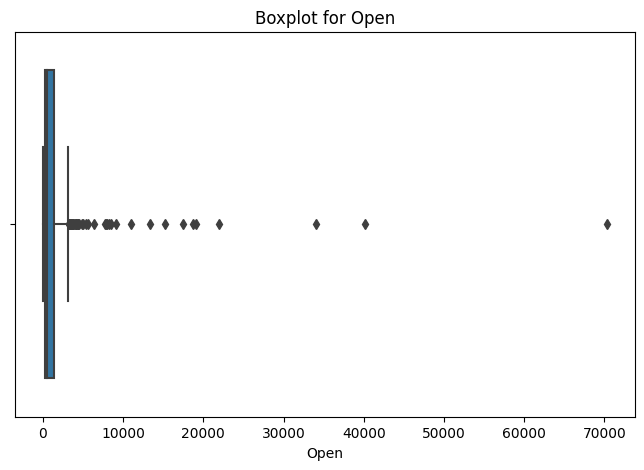

Number of outliers in Open: 44


In [37]:
# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[col])
plt.title(f'Boxplot for {col}')
plt.show()

# Display the number of outliers
print(f'Number of outliers in {col}: {outliers.sum()}')

# Decesion Tree

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
from google.colab import files

def entropy(series):
    """Calculate entropy for a given feature."""
    values, counts = np.unique(series, return_counts=True)
    probs = counts / len(series)
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

def information_gain(data, feature, target):
    """Calculate information gain for a feature."""
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum((counts / np.sum(counts)) * entropy(data[data[feature] == val][target]) for val in values)
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [40]:
# Calculate Entropy for the target variable
target_entropy = entropy(df['Change'])
print(f"Entropy for target variable: {target_entropy}")

# Calculate Information Gain for each feature
information_gains = {feature: information_gain(df, feature, 'Value (Indian Rupee)') for feature in df.columns[1:-1]}
print("\nInformation Gains:")
for feature, info_gain in information_gains.items():
    print(f"{feature}: {info_gain}")

Entropy for target variable: 8.368749416124693


<ipython-input-39-1ed9d26ddda8>:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  weighted_entropy = np.sum((counts / np.sum(counts)) * entropy(data[data[feature] == val][target]) for val in values)



Information Gains:
Symbol: [8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679 8.96866679
 8.96866679 8.96866679 8.96866679 

In [41]:
# Find the feature with the maximum information gain
max_info_gain_feature = max(information_gains, key=lambda k: np.max(information_gains[k]))
root_feature = max_info_gain_feature
print(f"\nRoot Node Feature: {root_feature}")


Root Node Feature: Symbol



Mean Squared Error: 8.260618071300069e+17


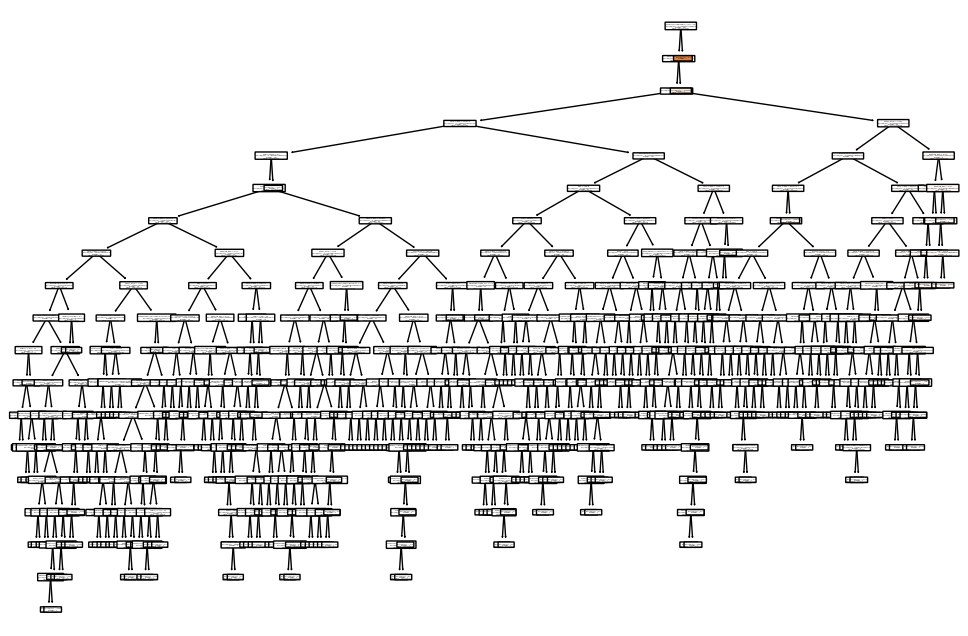

In [45]:
from sklearn.tree import DecisionTreeRegressor
# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(df.drop('Value (Indian Rupee)', axis=1))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df['Value (Indian Rupee)'], test_size=0.2, random_state=42)

# Building Decision Tree Model for regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Evaluating the Model
y_pred = dt_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

# Visualizing Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features.columns, filled=True, rounded=True)
plt.show()

## K-Mean Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


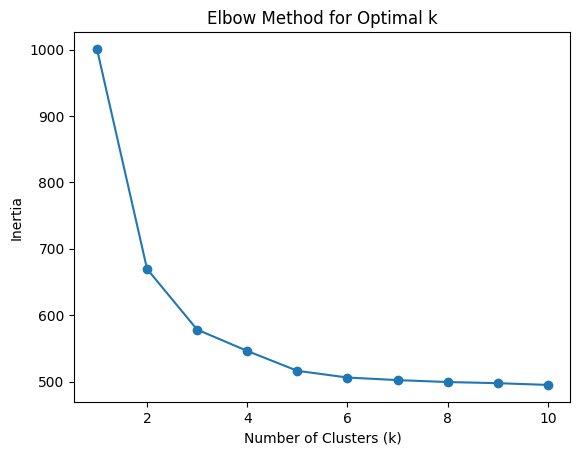

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



features = df[['Company Name', 'High']]

categorical_cols = ['Company Name']
numerical_cols = ['High']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


features_standardized = pipeline.fit_transform(features)


k_values = range(1, 11)


inertia_values = []

# Iterate over each k value
for k in k_values:
    # Create KMeans instance and fit the data
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_standardized)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                      Company Name    Symbol                        Industry  \
0                         MRF Ltd.       MRF  Automobile and Auto Components   
1             Page Industries Ltd.   PAGEIND                        Textiles   
2  Honeywell Automation India Ltd.    HONAUT                   Capital Goods   
3                    3M India Ltd.   3MINDIA                     Diversified   
4                Shree Cement Ltd.  SHREECEM          Construction Materials   

  Series     Open     High       Low  Previous Close  Last Traded Price  \
0     EQ  70300.0  72500.0  70300.00        70800.90           71900.00   
1     EQ  40199.0  41599.9  40124.95        40166.50           41236.60   
2     EQ  34069.8  34069.8  33133.65        33787.70           33244.05   
3     EQ  21950.0  21999.0  21126.05        21854.05           21575.00   
4     EQ  19050.0  19272.0  18898.85        19009.70           19233.05   

     Change  ... 52 Week High  52 Week Low  365 Day Percentage Chang

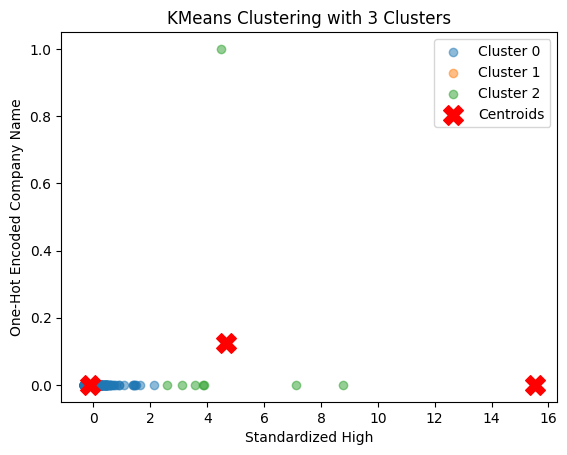

In [58]:

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

cluster_labels = kmeans.fit_predict(features_standardized)

df['Cluster'] = cluster_labels

print(df.head())

# Visualize the clusters
for cluster_label in range(optimal_k):
    plt.scatter(features_standardized.toarray()[cluster_labels == cluster_label, 0],
                features_standardized.toarray()[cluster_labels == cluster_label, 1],
                alpha=0.5, label=f'Cluster {cluster_label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Standardized High')
plt.ylabel('One-Hot Encoded Company Name')
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.legend()
plt.show()

